In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
class treeNode(object):
    def __init__(self, matrix=None, address="", 
                       leftChild=None, rightChild=None):
        """ A node of the Farey binary tree.
            Args:
            
            matrix: np 2x2 matrix (dtype=np.int64)
            address: string of 'L' and 'R' giving the address in the tree.
            leftChild, rightChild: children of that node.
        """
        
        self.matrix = matrix
        self.address = address
        self.leftChild = leftChild
        self.rightChild = rightChild
        
    def get_coord(self):
        """ Transforms the matrix in coordinates.
        """
        return sum(self.matrix[0]), sum(self.matrix[1])
    
    def get_trace(self):
        return self.matrix.trace()

In [3]:
def construct_tree(include_node_criterion, 
                   left_coord=(1,0), right_coord=(0,1), 
                   last_address = "", last_move = "", height=0):
    """ Construct the Farey binary tree.
        Args:
        
        include_node_criterion: function that takes a node and the height 
                                and decide whether or not to include this node in the tree (thus stops the construction).
        left_coord: starting at (1,0)
        right_coord: starting at (0,1)
        last_addresss: address of the father
        last_move: last move 'L' or 'R' to get to the current node
        height: current height in the tree
    """
    node = treeNode()
    node.matrix = np.array([left_coord,right_coord], dtype=np.int64)
    node.address = last_address + last_move
    
    
    if not include_node_criterion(node, height):
        return None
    
    node.leftChild = construct_tree(include_node_criterion,
                                    left_coord, node.get_coord(), 
                                    node.address, "L", height+1)
    
    node.rightChild = construct_tree(include_node_criterion,
                                    node.get_coord(), right_coord,
                                    node.address, "R", height+1)
    
    return node

In [4]:
def tree_size(node):
    """ Returns the numbe of nodes in the tree of a given root.
    """
    if node is None:
        return 0
    return 1 + tree_size(node.leftChild) + tree_size(node.rightChild)

In [5]:
def get_p_q_criterion(max_p, max_q):
    def p_q_criterion(node, height):
        return node.get_coord()[0] <= max_p and node.get_coord()[1] <= max_q
    return p_q_criterion

In [6]:
def get_max_height_criterion(max_height):
    def max_height_criterion(node, height):
        return height <= max_height
    return max_height_criterion

In [7]:
root = construct_tree(get_max_height_criterion(15))
print(tree_size(root))

65535


In [8]:
def get_coord_and_trace(node):
    """ Returns a list of the (coordinate, trace) of nodes in the tree.
    """
    
    if node is None:
        return []
    
    return [(node.get_coord(), node.get_trace())] + get_coord_and_trace(node.leftChild) + get_coord_and_trace(node.rightChild)

In [9]:
coord_and_trace = get_coord_and_trace(root)
coords = np.array( [ct[0] for ct in coord_and_trace] )

In [18]:
sub_coords = np.array([ a for a in coords if a[0] <= 100 and a[1] <= 100])
sub_trace = np.array([ct[1] for ct in coord_and_trace if ct[0][0] <= 100 and ct[0][1] <= 100])

In [23]:
def get_coords_with_trace(coord_and_trace, t):
    return np.array([ ct[0] for ct in coord_and_trace if ct[1] == t ])

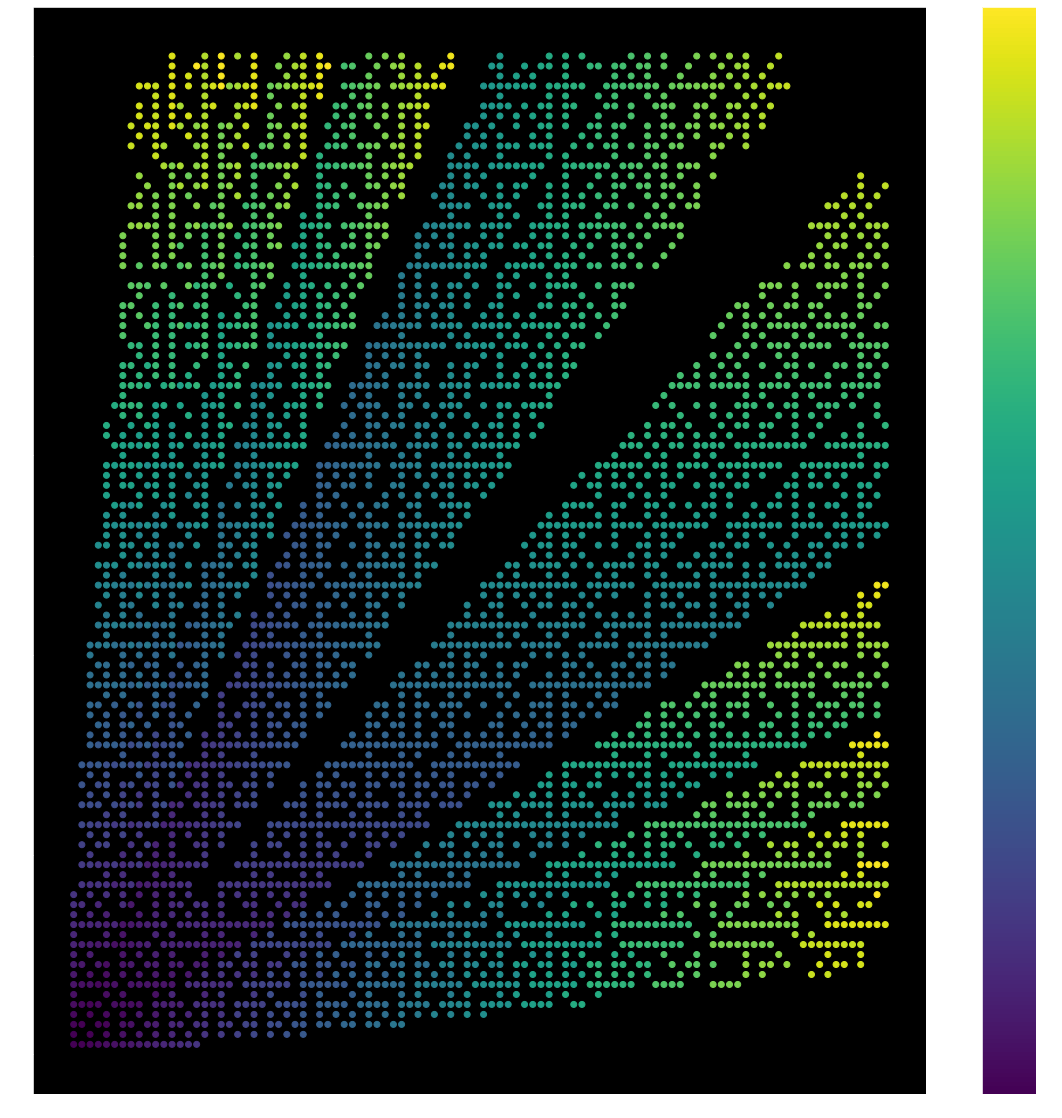

In [22]:
plt.figure(figsize=(20,20))
plt.scatter(sub_coords[:,0], sub_coords[:,1], c= sub_trace)
plt.colorbar()
plt.savefig('hihi_color.png')
plt.show()

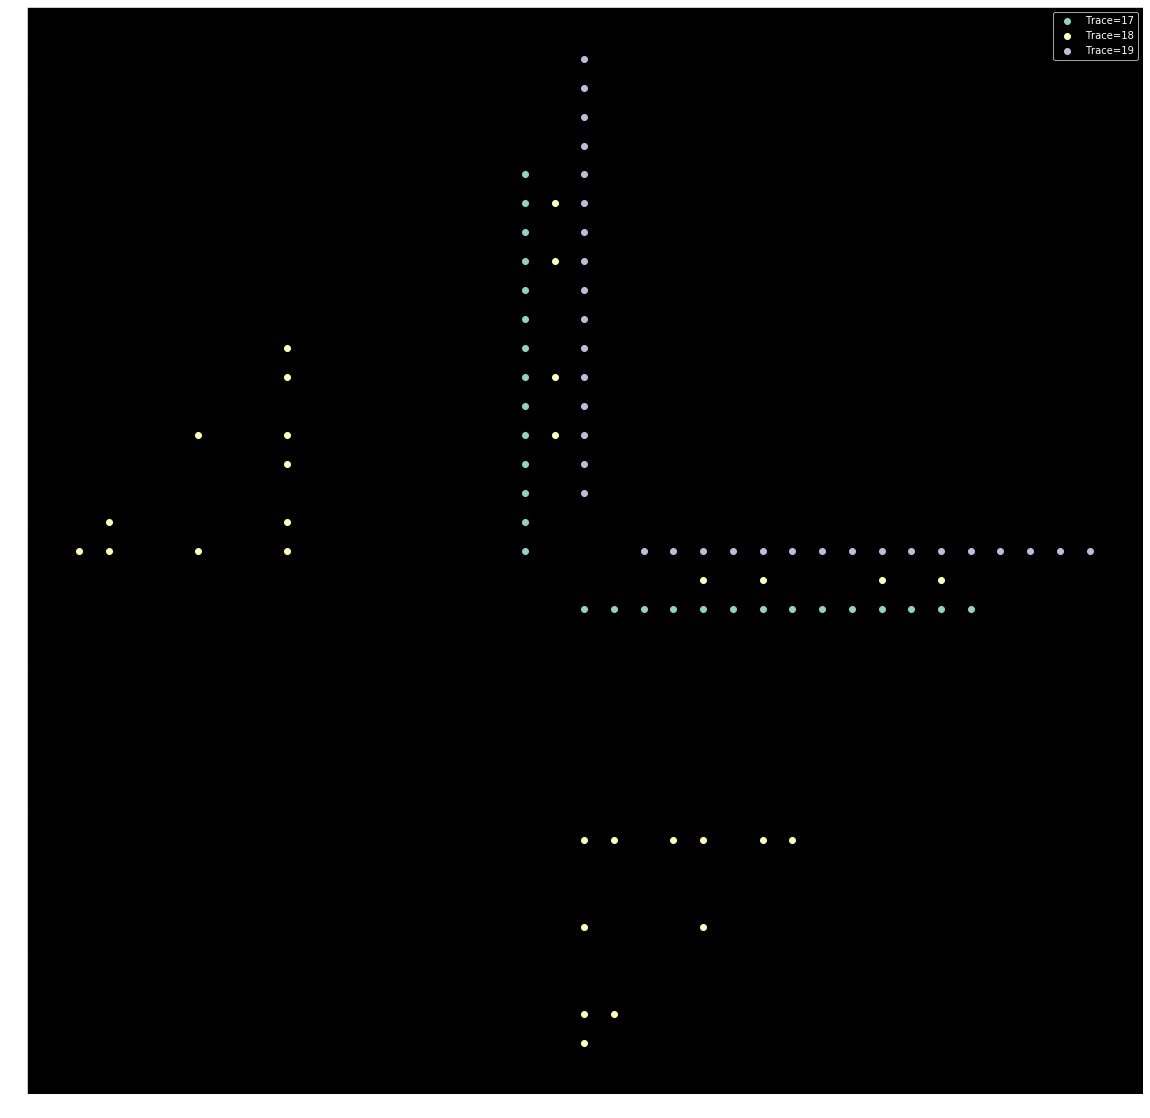

In [47]:
plt.figure(figsize=(20,20))
for i in range(17, 20):
    coords = get_coords_with_trace(coord_and_trace,i)
    plt.scatter(coords[:,0], coords[:, 1], label="Trace={}".format(i))
plt.legend()
plt.savefig("multiTrace.png")
plt.show()